In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [40]:


# Load CSV (uploaded in Colab)
df = pd.read_csv("train.csv")

# Quick look
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df = df.drop(columns=['Cabin'])


In [42]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [43]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [44]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


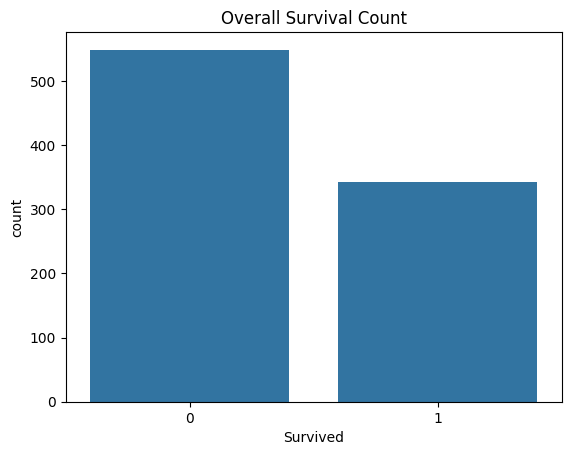

In [45]:
sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count")
plt.show()


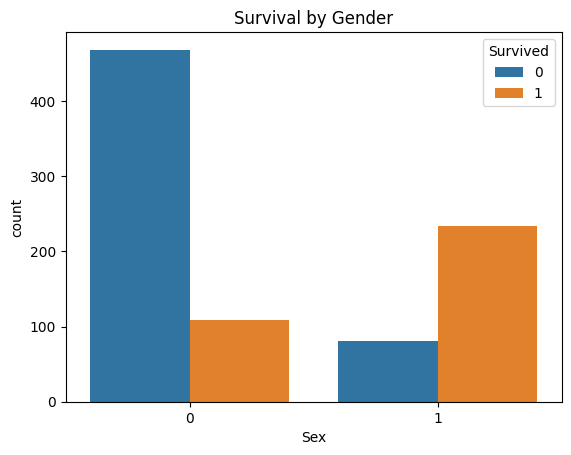

In [46]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


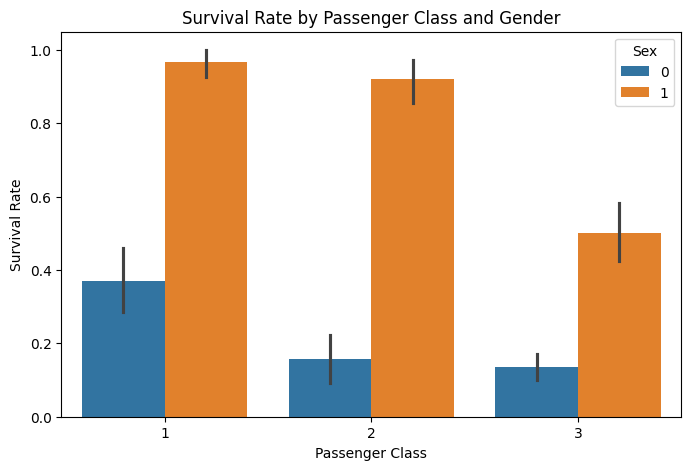

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Passenger Class and Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()


In [48]:
# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].copy()
y = df['Survived'].copy()

# Verify no missing values
X.isnull().sum()


,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7932960893854749
